# EDA 2 

After some data clean 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import pickle 

%matplotlib inline

print(os.listdir())

['EDA-1.ipynb', '.ipynb_checkpoints', 'EDA-2.ipynb']


In [3]:
data_dir = '../../DATA/kaggle/yoochoose/yoochoose-data/'
print(os.listdir(data_dir))

['yoochoose-test.dat', 'yoochoose-clicks.dat', 'my_training_data_raw.zip', 'dataset-README.txt', 'my_buys_data_raw.zip', 'my_eda1.pkl', 'clicks_tranformed.h5', 'yoochoose-buys.dat']


In [4]:
with open(data_dir+"my_eda1.pkl","rb") as file: 
    data = pickle.load(file)
clicks_df = data["clicks"]
buys_df = data["buys"]

In [5]:
clicks_df.head()

,min,max,Dwell_Time,Dwell_Time_Seconds,Total_Clicks,Dayofweek,Dayofmonth,Hourofclick,Timeofday,Click_Rate,First_Clicked_Item,Last_Clicked_Item,Total_Unique_Items,Total_Unique_Categories,Visited_Items,Visited_Categories,Number_Clicked_Visited_Categories,Special_Offer_Click
Session_ID,,,,,,,,,,,,,,,,,,
1,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,00:05:51.029000,351.0,4,0,7,10,Morning,0.011396,214536502,214577561,4,1,"[214536502, 214536500, 214536506, 214577561]","[13, 13, 13, 13]",4,0
2,2014-04-07 13:56:37.614000+00:00,2014-04-07 14:02:36.889000+00:00,00:05:59.275000,359.0,6,0,7,13,Noon,0.016713,214662742,214551617,5,1,"[214662742, 214662742, 214825110, 214757390, 2...","[13, 13, 13, 13, 13, 13]",6,0
3,2014-04-02 13:17:46.940000+00:00,2014-04-02 13:30:12.318000+00:00,00:12:25.378000,745.0,3,2,2,13,Noon,0.004027,214716935,214832672,3,1,"[214832672, 214716935, 214774687]","[13, 13, 13]",3,0
4,2014-04-07 12:09:10.948000+00:00,2014-04-07 12:26:25.416000+00:00,00:17:14.468000,1034.0,2,0,7,12,Morning,0.001934,214836765,214706482,2,1,"[214836765, 214706482]","[13, 13]",2,0
6,2014-04-06 16:58:20.848000+00:00,2014-04-06 17:02:26.976000+00:00,00:04:06.128000,246.0,2,6,6,16,Noon,0.008130,214701242,214826623,2,1,"[214701242, 214826623]","[13, 13]",2,0


In [6]:
buys_df.head()

,Number_items_bought,unique_items_bought,is_buy
Session_ID,,,
11,2,[214821371],1
12,1,[214717867],1
21,2,"[214548744, 214838503]",1
33,6,"[214834865, 214706441, 214820225]",1
46,2,[214716932],1


### Popularity index for first and last item clicked

In [8]:
names=["Session_ID", "Timestamp", "Item_ID", "Category"]

clicks_df = pd.read_csv(data_dir + 'yoochoose-clicks.dat',names=names,usecols = ['Item_ID'],index_col=0)

/media/commlab/TenTB/home/jan/.conda/envs/newml/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [9]:
temp_df = pd.DataFrame(clicks_df.index.value_counts())
temp_df.index.name = "Item_ID"
temp_df.columns = ['Count']

In [10]:
val = temp_df['Count'].sum()
temp_df['Popularity'] = temp_df['Count'].apply(lambda x : x / val )
temp_df['Popularity'] = temp_df['Popularity'].round(5)

In [34]:
clicks_df = data["clicks"]
clicks_df.head()

,min,max,Dwell_Time,Dwell_Time_Seconds,Total_Clicks,Dayofweek,Dayofmonth,Hourofclick,Timeofday,Click_Rate,First_Clicked_Item,Last_Clicked_Item,Total_Unique_Items,Total_Unique_Categories,Visited_Items,Visited_Categories,Number_Clicked_Visited_Categories,Special_Offer_Click
Session_ID,,,,,,,,,,,,,,,,,,
1,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,00:05:51.029000,351.0,4,0,7,10,Morning,0.011396,214536502,214577561,4,1,"[214536502, 214536500, 214536506, 214577561]","[13, 13, 13, 13]",4,0
2,2014-04-07 13:56:37.614000+00:00,2014-04-07 14:02:36.889000+00:00,00:05:59.275000,359.0,6,0,7,13,Noon,0.016713,214662742,214551617,5,1,"[214662742, 214662742, 214825110, 214757390, 2...","[13, 13, 13, 13, 13, 13]",6,0
3,2014-04-02 13:17:46.940000+00:00,2014-04-02 13:30:12.318000+00:00,00:12:25.378000,745.0,3,2,2,13,Noon,0.004027,214716935,214832672,3,1,"[214832672, 214716935, 214774687]","[13, 13, 13]",3,0
4,2014-04-07 12:09:10.948000+00:00,2014-04-07 12:26:25.416000+00:00,00:17:14.468000,1034.0,2,0,7,12,Morning,0.001934,214836765,214706482,2,1,"[214836765, 214706482]","[13, 13]",2,0
6,2014-04-06 16:58:20.848000+00:00,2014-04-06 17:02:26.976000+00:00,00:04:06.128000,246.0,2,6,6,16,Noon,0.008130,214701242,214826623,2,1,"[214701242, 214826623]","[13, 13]",2,0


In [35]:
clicks_df = pd.merge(clicks_df, temp_df, left_on='First_Clicked_Item',right_on=temp_df.index,how='inner',right_index=True)
clicks_df.rename(columns={'Popularity': 'First_Clicked_Item_Popularity'},inplace=True)

In [36]:
clicks_df.head()

,min,max,Dwell_Time,Dwell_Time_Seconds,Total_Clicks,Dayofweek,Dayofmonth,Hourofclick,Timeofday,Click_Rate,First_Clicked_Item,Last_Clicked_Item,Total_Unique_Items,Total_Unique_Categories,Visited_Items,Visited_Categories,Number_Clicked_Visited_Categories,Special_Offer_Click,Count,First_Clicked_Item_Popularity
Session_ID,,,,,,,,,,,,,,,,,,,,
1,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,00:05:51.029000,351.0,4,0,7,10,Morning,0.011396,214536502,214577561,4,1,"[214536502, 214536500, 214536506, 214577561]","[13, 13, 13, 13]",4,0,1814,0.00005
1343,2014-04-07 09:58:59.049000+00:00,2014-04-07 10:15:45.479000+00:00,00:16:46.430000,1006.0,6,0,7,9,Morning,0.005964,214536502,214551617,6,1,"[214820441, 214821290, 214821309, 214551617, 2...","[13, 13, 13, 13, 13, 13]",6,0,1814,0.00005
4952,2014-04-07 18:27:54.202000+00:00,2014-04-07 18:31:58.238000+00:00,00:04:04.036000,244.0,2,0,7,18,Evening,0.008197,214536502,214827020,2,1,"[214536502, 214827020]","[13, 13]",2,0,1814,0.00005
5168,2014-04-06 18:11:02.201000+00:00,2014-04-06 18:15:39.827000+00:00,00:04:37.626000,277.0,2,6,6,18,Evening,0.007220,214536502,214819490,2,1,"[214819490, 214536502]","[13, 13]",2,0,1814,0.00005
12628,2014-04-07 09:38:27.854000+00:00,2014-04-07 09:38:33.270000+00:00,00:00:05.416000,5.0,2,0,7,9,Morning,0.400000,214536502,214536502,1,1,"[214536502, 214536502]","[13, 13]",2,0,1814,0.00005


In [37]:
clicks_df = pd.merge(clicks_df, temp_df, left_on='Last_Clicked_Item',right_on=temp_df.index,how='inner',right_index=True)
clicks_df.rename(columns={'Popularity': 'Last_Clicked_Item_Popularity'},inplace=True)

In [38]:
clicks_df.head()

,min,max,Dwell_Time,Dwell_Time_Seconds,Total_Clicks,Dayofweek,Dayofmonth,Hourofclick,Timeofday,Click_Rate,...,Total_Unique_Items,Total_Unique_Categories,Visited_Items,Visited_Categories,Number_Clicked_Visited_Categories,Special_Offer_Click,Count_x,First_Clicked_Item_Popularity,Count_y,Last_Clicked_Item_Popularity
Session_ID,,,,,,,,,,,,,,,,,,,,,
1,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,00:05:51.029000,351.0,4,0,7,10,Morning,0.011396,...,4,1,"[214536502, 214536500, 214536506, 214577561]","[13, 13, 13, 13]",4,0,1814,0.00005,142,0.0
757283,2014-04-13 22:36:19.970000+00:00,2014-04-13 22:41:49.063000+00:00,00:05:29.093000,329.0,3,6,13,22,Night,0.009119,...,3,1,"[214577561, 214536613, 214685795]","[13, 13, 13]",3,0,9418,0.00029,142,0.0
4774378,2014-06-12 09:31:06.363000+00:00,2014-06-12 09:46:06.179000+00:00,00:14:59.816000,899.0,9,3,12,9,Morning,0.010011,...,9,1,"[214835167, 214651777, 214821020, 214829282, 2...","[13, 13, 13, 13, 13, 13, 13, 13, 13]",9,0,6722,0.00020,142,0.0
4105924,2014-06-06 13:08:37.208000+00:00,2014-06-06 13:14:04.873000+00:00,00:05:27.665000,327.0,3,4,6,13,Noon,0.009174,...,2,1,"[214577561, 214836137, 214836137]","[13, 13, 13]",3,0,6326,0.00019,142,0.0
56398,2014-04-02 14:43:33.519000+00:00,2014-04-02 14:56:43.841000+00:00,00:13:10.322000,790.0,6,2,2,14,Noon,0.007595,...,6,1,"[214835117, 214676580, 214530729, 214836506, 2...","[13, 13, 13, 13, 13, 13]",6,0,5822,0.00018,142,0.0


In [39]:
buys_df.head()

,Number_items_bought,unique_items_bought,is_buy
Session_ID,,,
11,2,[214821371],1
12,1,[214717867],1
21,2,"[214548744, 214838503]",1
33,6,"[214834865, 214706441, 214820225]",1
46,2,[214716932],1


In [41]:
my_train_df = pd.merge(clicks_df, buys_df, on='Session_ID', how='outer',right_index=True,left_index=True)

In [43]:
print(clicks_df.shape)
print(buys_df.shape)
print(my_train_df.shape)

(9249729, 22)
(509696, 3)
(9351669, 25)


**Checking for the Probability of First Clicked item and Last Clicked item being Purchased**

In [44]:
temp = my_train_df[my_train_df['is_buy'] == 1]
#temp.First_Clicked_Item.iloc[0]
#temp.unique_items_bought.iloc[0]
temp.head()

,min,max,Dwell_Time,Dwell_Time_Seconds,Total_Clicks,Dayofweek,Dayofmonth,Hourofclick,Timeofday,Click_Rate,...,Visited_Categories,Number_Clicked_Visited_Categories,Special_Offer_Click,Count_x,First_Clicked_Item_Popularity,Count_y,Last_Clicked_Item_Popularity,Number_items_bought,unique_items_bought,is_buy
Session_ID,,,,,,,,,,,,,,,,,,,,,
11,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,[214821371],1.0
1,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,00:05:51.029000,351.0,4.0,0.0,7.0,10.0,Morning,0.011396,...,"[13, 13, 13, 13]",4.0,0.0,1814.0,0.00005,142.0,0.00000,1.0,[214717867],1.0
2,2014-04-07 13:56:37.614000+00:00,2014-04-07 14:02:36.889000+00:00,00:05:59.275000,359.0,6.0,0.0,7.0,13.0,Noon,0.016713,...,"[13, 13, 13, 13, 13, 13]",6.0,0.0,3915.0,0.00012,10960.0,0.00033,2.0,"[214548744, 214838503]",1.0
3,2014-04-02 13:17:46.940000+00:00,2014-04-02 13:30:12.318000+00:00,00:12:25.378000,745.0,3.0,2.0,2.0,13.0,Noon,0.004027,...,"[13, 13, 13]",3.0,0.0,30752.0,0.00093,3444.0,0.00010,6.0,"[214834865, 214706441, 214820225]",1.0
4,2014-04-07 12:09:10.948000+00:00,2014-04-07 12:26:25.416000+00:00,00:17:14.468000,1034.0,2.0,0.0,7.0,12.0,Morning,0.001934,...,"[13, 13]",2.0,0.0,3051.0,0.00009,919.0,0.00003,2.0,[214716932],1.0


In [45]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509696 entries, 11 to 11562121
Data columns (total 25 columns):
min                                  407756 non-null datetime64[ns, UTC]
max                                  407756 non-null datetime64[ns, UTC]
Dwell_Time                           407756 non-null timedelta64[ns]
Dwell_Time_Seconds                   407756 non-null float64
Total_Clicks                         407756 non-null float64
Dayofweek                            407756 non-null float64
Dayofmonth                           407756 non-null float64
Hourofclick                          407756 non-null float64
Timeofday                            407756 non-null category
Click_Rate                           407756 non-null float64
First_Clicked_Item                   407756 non-null float64
Last_Clicked_Item                    407756 non-null float64
Total_Unique_Items                   407756 non-null float64
Total_Unique_Categories              407756 non-null float64

In [46]:
def check_data(list1,list2,list3):
    if list3 == 1:
        if list1 in list2:
            return 1
        else:
            return 0

In [48]:

#temp['First_Item_Probab_Check'] = temp.apply(lambda x : check_data(x.First_Clicked_Item,x.unique_items_bought,x.is_buy),axis=1)
#temp['Last_Item_Probab_Check'] = temp.apply(lambda x : check_data(x.Last_Clicked_Item,x.unique_items_bought,x.is_buy),axis=1)

#sns.barplot(x=temp.First_Item_Probab_Check.value_counts().index, y=temp.First_Item_Probab_Check.value_counts()/temp.First_Item_Probab_Check.value_counts().sum())
#plt.title('Probability of First clicked item being Purchased')
#plt.xlabel('First Clicked Item')
#plt.legend()


#sns.barplot(x=temp.Last_Item_Probab_Check.value_counts().index, y=temp.Last_Item_Probab_Check.value_counts()/temp.Last_Item_Probab_Check.value_counts().sum())
#plt.title('Probability of Last clicked item being Purchased')
#plt.xlabel('Last Clicked Item')
#plt.legend()

**Dwelling Time**

In [49]:
#my_train_df.info()
#[my_train_df['is_buy'] == 1]['Dwell_Time_Seconds'].mean()
my_train_df[my_train_df['is_buy'] == 1]['Dwell_Time_Seconds'].mean()

399.39359567976925

**Dwelling Time not Buying**

In [50]:
my_train_df[my_train_df['is_buy'] == 0]['Dwell_Time_Seconds'].mean()

nan

**Most Popular Day**

Text(0.5, 1.0, 'Most Popular Days based on Number of sessions.[0 - 6] -> [Monday - Sunday]')

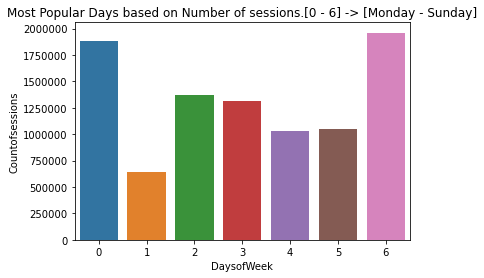

In [128]:
ax = sns.barplot(x=my_train_df['Dayofweek'].value_counts().index,y=my_train_df['Dayofweek'].value_counts(),data=my_train_df)
plt.xlabel('DaysofWeek')
plt.ylabel('Countofsessions')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Most Popular Days based on Number of sessions.[0 - 6] -> [Monday - Sunday]')

**Popular Day for Shopping**

Text(0.5, 1.0, 'Popular Days for Buying Events based on Number of Sessions.')

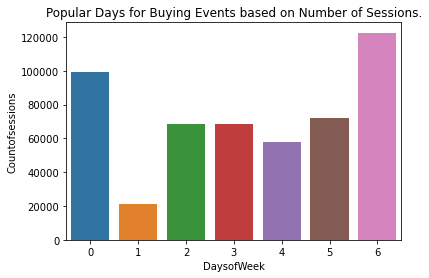

In [129]:
my_train_df_temp = my_train_df[my_train_df['is_buy'] == 1]
ax = sns.barplot(x=my_train_df_temp['Dayofweek'].value_counts().index,y=my_train_df_temp['Dayofweek'].value_counts(),data=my_train_df_temp)
plt.xlabel('DaysofWeek')
plt.ylabel('Countofsessions')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Popular Days for Buying Events based on Number of Sessions.')

**Popular Time for Shopping**

Text(0.5, 1.0, 'Best Time of the Day for a buying Event.')

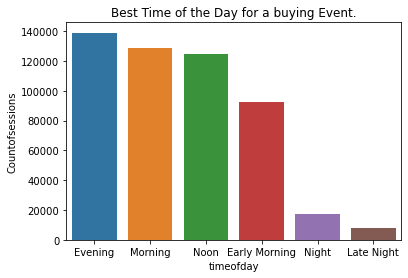

In [132]:
my_train_df_temp['Timeofday'].value_counts()
ax = sns.barplot(x=my_train_df_temp['Timeofday'].value_counts().index,y=my_train_df_temp['Timeofday'].value_counts(),data=my_train_df_temp)
plt.xlabel('timeofday')
plt.ylabel('Countofsessions')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Best Time of the Day for a buying Event.')

### Buying Distribution 

In [134]:
print(my_train_df['is_buy'].value_counts())

0    8740033
1     509696
Name: is_buy, dtype: int64


In [136]:
print('Proportion of buying on Data :  {}'.format(my_train_df['is_buy'].sum() / len(my_train_df)))

Proportion of buying on Data :  0.05510388466516154


***Data is highly IMBALANCE!***

### Correlation Matrix

In [137]:
corr = my_train_df.corr()
corr

,Session_ID,Dwell_Time_Seconds,Total_Clicks,Dayofweek,Dayofmonth,Hourofclick,Click_Rate,First_Clicked_Item,Last_Clicked_Item,Total_Unique_Items,Total_Unique_Categories,Number_Clicked_Visited_Categories,Special_Offer_Click,is_buy,Count_x,First_Clicked_Item_Popularity,Count_y,Last_Clicked_Item_Popularity,Number_items_bought
Session_ID,1.000000,-0.017906,-0.045410,0.027207,0.159591,-0.010415,-0.041825,-0.077598,-0.073098,-0.026010,0.224361,-0.045410,0.645450,-0.012307,-0.005470,-0.005429,0.004587,0.004643,0.105082
Dwell_Time_Seconds,-0.017906,1.000000,0.543990,0.018420,-0.005240,0.012189,-0.112037,0.003810,0.000353,0.469597,0.259364,0.543990,0.012964,0.154936,-0.004062,-0.004063,-0.033194,-0.033190,0.247593
Total_Clicks,-0.045410,0.543990,1.000000,0.026332,-0.010101,0.018208,-0.067560,-0.025422,-0.027368,0.922318,0.302072,1.000000,0.025341,0.186018,0.001536,0.001521,-0.046123,-0.046132,0.516924
Dayofweek,0.027207,0.018420,0.026332,1.000000,0.029015,0.052802,-0.004014,-0.032581,-0.030900,0.024945,0.015479,0.026332,0.006534,0.026994,-0.007206,-0.007212,-0.016514,-0.016521,0.062049
Dayofmonth,0.159591,-0.005240,-0.010101,0.029015,1.000000,-0.008314,-0.001423,0.002955,0.003602,-0.009104,0.040149,-0.010101,0.099639,-0.005405,0.024721,0.024704,0.028577,0.028562,0.020447
Hourofclick,-0.010415,0.012189,0.018208,0.052802,-0.008314,1.000000,0.010037,-0.000454,-0.000374,0.013069,0.013593,0.018208,-0.027094,-0.000753,-0.006691,-0.006679,-0.008058,-0.008051,-0.021580
Click_Rate,-0.041825,-0.112037,-0.067560,-0.004014,-0.001423,0.010037,1.000000,0.048667,0.053261,-0.094585,-0.053077,-0.067560,-0.047182,-0.037852,0.023990,0.023991,0.041459,0.041461,-0.042467
First_Clicked_Item,-0.077598,0.003810,-0.025422,-0.032581,0.002955,-0.000454,0.048667,1.000000,0.886710,-0.044524,-0.028102,-0.025422,-0.071592,0.043748,0.518260,0.518423,0.481356,0.481527,-0.081176
Last_Clicked_Item,-0.073098,0.000353,-0.027368,-0.030900,0.003602,-0.000374,0.053261,0.886710,1.000000,-0.048366,-0.026675,-0.027368,-0.067776,0.044337,0.458938,0.459083,0.541168,0.541356,-0.078829
Total_Unique_Items,-0.026010,0.469597,0.922318,0.024945,-0.009104,0.013069,-0.094585,-0.044524,-0.048366,1.000000,0.330629,0.922318,0.055849,0.134970,-0.010901,-0.010917,-0.067102,-0.067110,0.541510


<AxesSubplot:>

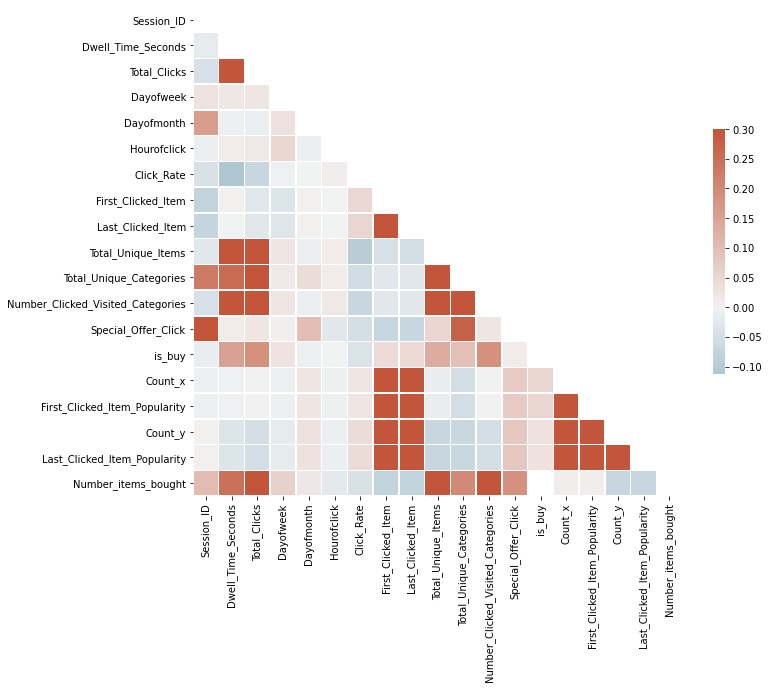

In [138]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [140]:
corr_target = abs(corr['is_buy'])
corr_target.sort_values()

Hourofclick                          0.000753
Dayofmonth                           0.005405
Session_ID                           0.012307
Special_Offer_Click                  0.012874
Dayofweek                            0.026994
Count_y                              0.032056
Last_Clicked_Item_Popularity         0.032072
Click_Rate                           0.037852
First_Clicked_Item                   0.043748
Last_Clicked_Item                    0.044337
Count_x                              0.052991
First_Clicked_Item_Popularity        0.053000
Total_Unique_Categories              0.094490
Total_Unique_Items                   0.134970
Dwell_Time_Seconds                   0.154936
Total_Clicks                         0.186018
Number_Clicked_Visited_Categories    0.186018
is_buy                               1.000000
Number_items_bought                       NaN
Name: is_buy, dtype: float64

## Handle Imbalance Data 

* Over with **SMOTE**
* Combine with **Statify**

#### Handle with undersampling first ###

In [141]:
def undersampling(train_data):   
        
        count_class_0, count_class_1 = train_data['is_buy'].value_counts()
        df_class_0 = train_data[train_data['is_buy'] == 0]
        df_class_1 = train_data[train_data['is_buy'] == 1]
        df_class_0_under = df_class_0.sample(count_class_1)
        df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        df_test_under['is_buy'].value_counts()
        return df_test_under

In [142]:
new_balanced_data = undersampling(my_train_df)
print(new_balanced_data['is_buy'].value_counts())

1    509696
0    509696
Name: is_buy, dtype: int64


In [144]:
new_balanced_data[new_balanced_data['is_buy']==1].head()

,Session_ID,min,max,Dwell_Time,Dwell_Time_Seconds,Total_Clicks,Dayofweek,Dayofmonth,Hourofclick,Timeofday,...,Visited_Categories,Number_Clicked_Visited_Categories,Special_Offer_Click,is_buy,Count_x,First_Clicked_Item_Popularity,Count_y,Last_Clicked_Item_Popularity,Number_items_bought,unique_items_bought
5,857661,2014-04-12 07:08:37.285000+00:00,2014-04-12 07:28:22.467000+00:00,0 days 00:19:45.182000000,1185.0,9,5,12,7,Early Morning,...,[13 13 13 13 13 13 13 13 13],9,0,1,227,0.00001,142,0.00000,2.0,[214821365 214840483]
14,3647607,2014-05-29 10:51:47.645000+00:00,2014-05-29 10:56:06.800000+00:00,0 days 00:04:19.155000000,259.0,3,3,29,10,Morning,...,[13 13 13],3,0,1,380,0.00001,142,0.00000,2.0,[214578281 214578283]
34,4707057,2014-06-12 20:45:26.775000+00:00,2014-06-12 21:19:03.913000+00:00,0 days 00:33:37.138000000,2017.0,17,3,12,20,Evening,...,[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 ...,17,0,1,10017,0.00030,142,0.00000,1.0,[214839339]
39,469514,2014-04-07 09:19:16.552000+00:00,2014-04-07 09:33:52.012000+00:00,0 days 00:14:35.460000000,875.0,10,0,7,9,Morning,...,[13 13 13 13 13 13 13 13 13 13],10,0,1,30752,0.00093,10960,0.00033,1.0,[214716932]
48,860852,2014-04-09 18:53:52.717000+00:00,2014-04-09 19:12:04.950000+00:00,0 days 00:18:12.233000000,1092.0,16,2,9,18,Evening,...,[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13],16,0,1,7614,0.00023,10960,0.00033,6.0,[214820441 214826897 214844357 214698446 21482...


In [145]:
def one_hot_encode(column_name,training_data):
    temp = pd.get_dummies(training_data[column_name])
    training_data = pd.concat([training_data, temp], axis=1)
    return training_data

In [148]:
updated_training_data = one_hot_encode("Timeofday",new_balanced_data)

In [149]:
updated_training_data.head()

,Session_ID,min,max,Dwell_Time,Dwell_Time_Seconds,Total_Clicks,Dayofweek,Dayofmonth,Hourofclick,Timeofday,...,Count_y,Last_Clicked_Item_Popularity,Number_items_bought,unique_items_bought,Early Morning,Evening,Late Night,Morning,Night,Noon
5192817,5209639,2014-06-19 15:23:21.184000+00:00,2014-06-19 15:24:15.598000+00:00,0 days 00:00:54.414000000,54.0,2,3,19,15,Noon,...,1035,0.00003,NaN,NaN,0,0,0,0,0,1
6436171,6937127,2014-07-24 07:01:17.582000+00:00,2014-07-24 07:11:53.875000+00:00,0 days 00:10:36.293000000,636.0,2,3,24,7,Early Morning,...,15767,0.00048,NaN,NaN,1,0,0,0,0,0
6805863,10910307,2014-09-22 08:59:25.563000+00:00,2014-09-22 09:01:40.239000+00:00,0 days 00:02:14.676000000,134.0,2,0,22,8,Early Morning,...,3041,0.00009,NaN,NaN,1,0,0,0,0,0
8518973,7361382,2014-07-30 08:18:59.765000+00:00,2014-07-30 08:18:59.765000+00:00,0 days 00:00:00.000000000,0.0,1,2,30,8,Early Morning,...,303,0.00001,NaN,NaN,1,0,0,0,0,0
1978069,8127568,2014-08-13 07:57:27.711000+00:00,2014-08-13 07:57:27.711000+00:00,0 days 00:00:00.000000000,0.0,1,2,13,7,Early Morning,...,13718,0.00042,NaN,NaN,1,0,0,0,0,0


In [150]:
preprocessed_training_data = updated_training_data.loc[:,~updated_training_data.columns.isin([
    'min', 'max', 'dwell_time',
       'first_clicked_item', 'last_clicked_item','timeofday',
       'visited_items', 'visited_categories','hourofclick',
       'Number_items_bought', 'unique_items_bought', 'count_x',
       'count_y'
])]

In [151]:
preprocessed_training_data.head()

,Session_ID,Dwell_Time,Dwell_Time_Seconds,Total_Clicks,Dayofweek,Dayofmonth,Hourofclick,Timeofday,Click_Rate,First_Clicked_Item,...,Count_x,First_Clicked_Item_Popularity,Count_y,Last_Clicked_Item_Popularity,Early Morning,Evening,Late Night,Morning,Night,Noon
5192817,5209639,0 days 00:00:54.414000000,54.0,2,3,19,15,Noon,0.037037,214684372,...,21195,0.00064,1035,0.00003,0,0,0,0,0,1
6436171,6937127,0 days 00:10:36.293000000,636.0,2,3,24,7,Early Morning,0.003145,214709949,...,1473,0.00004,15767,0.00048,1,0,0,0,0,0
6805863,10910307,0 days 00:02:14.676000000,134.0,2,0,22,8,Early Morning,0.014925,214853220,...,3041,0.00009,3041,0.00009,1,0,0,0,0,0
8518973,7361382,0 days 00:00:00.000000000,0.0,1,2,30,8,Early Morning,0.000000,214847651,...,303,0.00001,303,0.00001,1,0,0,0,0,0
1978069,8127568,0 days 00:00:00.000000000,0.0,1,2,13,7,Early Morning,0.000000,214587937,...,13718,0.00042,13718,0.00042,1,0,0,0,0,0


***Another Correlation Matrix***

In [156]:
corrMatrix = preprocessed_training_data.corr()


<AxesSubplot:>

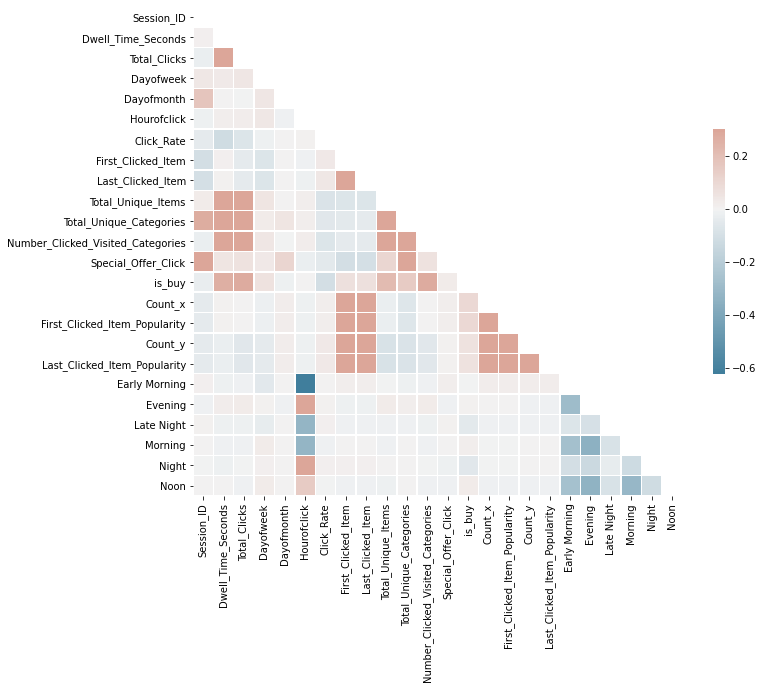

In [158]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corrMatrix, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [159]:
corr_target = abs(corr['is_buy'])
corr_target.sort_values()

Hourofclick                          0.000753
Dayofmonth                           0.005405
Session_ID                           0.012307
Special_Offer_Click                  0.012874
Dayofweek                            0.026994
Count_y                              0.032056
Last_Clicked_Item_Popularity         0.032072
Click_Rate                           0.037852
First_Clicked_Item                   0.043748
Last_Clicked_Item                    0.044337
Count_x                              0.052991
First_Clicked_Item_Popularity        0.053000
Total_Unique_Categories              0.094490
Total_Unique_Items                   0.134970
Dwell_Time_Seconds                   0.154936
Total_Clicks                         0.186018
Number_Clicked_Visited_Categories    0.186018
is_buy                               1.000000
Number_items_bought                       NaN
Name: is_buy, dtype: float64

In [185]:
preprocessed_training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019392 entries, 5192817 to 9249594
Data columns (total 28 columns):
Session_ID                           1019392 non-null int64
Dwell_Time                           1019392 non-null object
Dwell_Time_Seconds                   1019392 non-null float64
Total_Clicks                         1019392 non-null int64
Dayofweek                            1019392 non-null int64
Dayofmonth                           1019392 non-null int64
Hourofclick                          1019392 non-null int64
Timeofday                            1019392 non-null object
Click_Rate                           1019392 non-null float64
First_Clicked_Item                   1019392 non-null int64
Last_Clicked_Item                    1019392 non-null int64
Total_Unique_Items                   1019392 non-null int64
Total_Unique_Categories              1019392 non-null int64
Visited_Items                        1019392 non-null object
Visited_Categories                

In [212]:
def fix_list(x):
    if x:
        return x[1:-1].split(" ")
    else:
        return []

In [213]:
preprocessed_training_data['Visited_Items'] = preprocessed_training_data['Visited_Items'].apply(fix_list) 
#fix_list('[2 3 4 5]')

AttributeError: 'list' object has no attribute 'split'

In [160]:
X = preprocessed_training_data.loc[:,~preprocessed_training_data.columns.isin(['is_buy'])]
y = preprocessed_training_data.loc[:,preprocessed_training_data.columns.isin(['is_buy'])]

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [165]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203879 entries, 7818254 to 2626650
Data columns (total 1 columns):
is_buy    203879 non-null int64
dtypes: int64(1)
memory usage: 3.1 MB


In [166]:
y_test['is_buy'] = pd.to_numeric(y_test['is_buy']).round(0).astype(int)
y_train['is_buy'] = pd.to_numeric(y_train['is_buy']).round(0).astype(int)

<ipython-input-166-4a18aa482eca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['is_buy'] = pd.to_numeric(y_test['is_buy']).round(0).astype(int)
<ipython-input-166-4a18aa482eca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['is_buy'] = pd.to_numeric(y_train['is_buy']).round(0).astype(int)


8080989    [214846419 214849192 214849185 214849320 21484...
7558198                                [214530491 214644626]
1531011                      [214820261 214576280 214820261]
3889845            [643078800 643078800 643078800 643078800]
7673161                                [214712270 214572182]
Name: Visited_Items, dtype: object

### Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression